# Sample usage

This notebook gives you introduction to use the package.

In [1]:
import sys
sys.path.append("../")
sys.path.append(".")
from model_criticism_mmd import ModelTrainerTorchBackend, MMD, TwoSampleDataSet, split_data
from model_criticism_mmd.backends import kernels_torch

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import torch

In [3]:
N_EPOCHS = 300

# Device choice

If you are able to use CUDA, you can give `device_obj` to objects. The default value is CPU.

In [4]:
device_obj = torch.device('cpu')

# Scenario-1: 2 distributions are similar

In [5]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [6]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

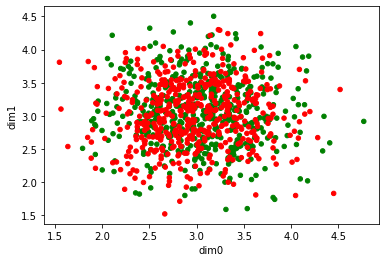

In [7]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [8]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [9]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)
# you can use split_data function also.
# dataset_train, dataset_val, = split_data(x_train, y_train)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=True), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator=mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=N_EPOCHS, batchsize=200)

2021-08-06 10:43:24,153 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-06 10:43:24,168 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 0.607
2021-08-06 10:43:24,174 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.01882795976131124, ratio = [1.93844165] obj = [-0.66188438]
2021-08-06 10:43:24,996 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.0036853437262452937 obj [-3.59433361] val-MMD^2 0.02274168030498047 val-ratio [2.02936831] val-obj [-0.70772457]  elapsed: 0.0
2021-08-06 10:43:26,612 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.005729467590793874 obj [-4.02272912] val-MMD^2 0.026230847395191215 val-ratio [2.36083393] val-obj [-0.85901492]  elapsed: 0.0
2021-08-06 10:43:29,401 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.005598049418288453 obj [-4.00788316] val-MMD^2 0.027372549246052147 val-ratio [2.22666333] val

In [10]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales}, {trained_params}')

Preffered parameters scales = [-20.054941 -43.800385], {'log_sigma': tensor(-0.5000, dtype=torch.float64, requires_grad=True)}


In [11]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.020156547395953045


# Scenario-2: 2 distributions are not similar

In [12]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [13]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

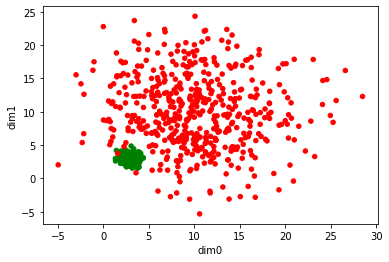

In [14]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [15]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [16]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=True), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=N_EPOCHS, batchsize=200)

2021-08-06 10:43:56,468 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-06 10:43:56,496 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 4.52
2021-08-06 10:43:56,509 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.7937898971914418, ratio = [17.81063943] obj = [-2.879796]
2021-08-06 10:43:57,006 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.8755458060526844 obj [-3.23556457] val-MMD^2 0.9235703473160752 val-ratio [22.04950146] val-obj [-3.09328999]  elapsed: 0.0
2021-08-06 10:43:58,873 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.9244930258374895 obj [-4.14853783] val-MMD^2 0.9439823452310794 val-ratio [56.52804829] val-obj [-4.03473694]  elapsed: 0.0
2021-08-06 10:44:01,074 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.8886228754428827 obj [-4.2000277] val-MMD^2 0.9103771092980939 val-ratio [55.20211443] val-obj [-4.0110

In [17]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales} / {trained_params}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters scales = [2.4579825 2.636729 ] / {'log_sigma': tensor(1.5092, dtype=torch.float64, requires_grad=True)}
MMD^2 distance = 0.9100029667087247


# Kernel functions

You can set kernel functions as you like. The Kernel functions are in `model_criticism_mmd.backends.kernels_torch`

In [18]:
# example with Matern Kernel
from model_criticism_mmd.backends import kernels_torch
kernel_matern = kernels_torch.MaternKernelFunction(device_obj=device_obj, nu=0.5)
mmd_estimator_matern = MMD(kernel_matern, device_obj=device_obj)
trainer_matern = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj)
trained_obj_matern = trainer_matern.train(dataset_training=dataset_train, dataset_validation=dataset_val, 
                                          num_epochs=N_EPOCHS, batchsize=200)

2021-08-06 10:44:26,273 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.4701757821620347, ratio = [7.83657987] obj = [-2.0588025]
2021-08-06 10:44:26,950 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.6560025901079157 obj [-2.55401229] val-MMD^2 0.6136446653036449 val-ratio [9.37112733] val-obj [-2.2376334]  elapsed: 0.0
2021-08-06 10:44:29,435 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.901927731816258 obj [-4.19040043] val-MMD^2 0.918907437946007 val-ratio [55.85244866] val-obj [-4.02271337]  elapsed: 0.0
2021-08-06 10:44:32,142 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.8881669570274451 obj [-4.20039102] val-MMD^2 0.910387650424706 val-ratio [55.29280352] val-obj [-4.01264276]  elapsed: 0.0
2021-08-06 10:44:37,198 - model_criticism_mmd.logger_unit - INFO -    100: [avg train] MMD^2 0.8879419751644662 obj [-4.2003907] val-MMD^2 0.9101266588145923 val-ratio [55.25060612] val-obj [-4.01

In [19]:
trained_obj_matern.scales

array([1.2727972, 1.364681 ], dtype=float32)

As you see, the scales are totally different from the one with RBFKernel

## Kernel selection by test-power

In [22]:
from model_criticism_mmd import SelectionKernels
from model_criticism_mmd.backends.kernels_torch import BasicRBFKernelFunction, MaternKernelFunction
# scales can be None. In the case, the scales vector is initialized with 1.0 values.
scales = torch.tensor([0.05, 0.05])
kernels = [(scales, BasicRBFKernelFunction(device_obj=device_obj)),
           (scales, MaternKernelFunction(nu=0.5, device_obj=device_obj))]
# if is_training=True, the SelectionKernels class runs optimizations during selections.
selection_obj = SelectionKernels(candidate_kernels=kernels, dataset_validation=dataset_val, is_training=False)
result_select = selection_obj.run_selection()

2021-08-06 10:46:59,124 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-06 10:46:59,142 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 0.354
2021-08-06 10:46:59,160 - model_criticism_mmd.logger_unit - INFO - Kernel-type: <model_criticism_mmd.backends.kernels_torch.rbf_kernel.BasicRBFKernelFunction object at 0x7f6516da03c8> Ratio: 17.793327798591584
2021-08-06 10:46:59,177 - model_criticism_mmd.logger_unit - INFO - Kernel-type: <model_criticism_mmd.backends.kernels_torch.matern_kernel.MaternKernelFunction object at 0x7f6516da0198> Ratio: 22.6118743359717


The return object is a sorted list of tuples. The tuple has `(kernel-object, test-power)`.

In [23]:
result_select

[(<model_criticism_mmd.backends.kernels_torch.matern_kernel.MaternKernelFunction at 0x7f6516da0198>,
  22.6118743359717),
 (<model_criticism_mmd.backends.kernels_torch.rbf_kernel.BasicRBFKernelFunction at 0x7f6516da03c8>,
  17.793327798591584)]

# ARD weight

As you see in data generation, the data has huge variance only on __the 1st dimension__.

Then, the ARD weight has the highest value on the 1st dimension.

Remebmer that you set __opt_sigma = False__ when you need ARD weights.

In [24]:
import numpy
size = 100
n_epoch = N_EPOCHS
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

In [25]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for
dim_most_diff_varianace: int = sorted([(n_dim, abs(x[:,n_dim].var() - y[:,n_dim].var())) for n_dim in [0, 1, 2]],
                                      key=lambda t: t[1], reverse=True)[0][0]

1 dim. mean(x)=1.0 mean(y)=0.41871159729264995 var(x)=0.0 var(y)=1918.2251534480486
2 dim. mean(x)=9.992008031251236 mean(y)=9.995245205118387 var(x)=0.03246697534565709 var(y)=0.04241023523367131
3 dim. mean(x)=10.023406944762574 mean(y)=10.03021844196094 var(x)=0.03685338988723999 var(y)=0.03915671812097557


In [26]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_val, y_val, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=N_EPOCHS, batchsize=200)

2021-08-06 10:49:09,540 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-06 10:49:09,559 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 8.22
2021-08-06 10:49:09,578 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.5768756979268792, ratio = [4.99608965] obj = [-1.60865554]
2021-08-06 10:49:09,949 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.6878285454268735 obj [-2.27116364] val-MMD^2 0.6589877955488587 val-ratio [5.53111588] val-obj [-1.71038958]  elapsed: 0.0
2021-08-06 10:49:11,197 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.8424279489131765 obj [-2.6648229] val-MMD^2 0.9344080312815981 val-ratio [8.25087533] val-obj [-2.1103193]  elapsed: 0.0
2021-08-06 10:49:12,640 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.9152920637798859 obj [-2.94060623] val-MMD^2 0.9852127127893429 val-ratio [10.23793653] val-obj [-2.326100

In [27]:
assert np.argmax(trained_obj.scales) == dim_most_diff_varianace
trained_obj.scales

array([12.477573  ,  0.83374816,  0.620236  ], dtype=float32)

As you see, the TwoSampleDataSetex of max(scales) is same as the index that data has the highest variance.